# Seaborn

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) est une bibliothèque construite au dessus Matplotlib. Elle amméliore le rendu graphique par défaut de Matplotlib et offre des graphiques statistiques. Il est souvent plus simple d'essayer de faire sa figure directement sous
Seaborn et si le rendu n'est pas satisfaisant ou qu'on ne peut pas faire ce qu'on désire, alors on utilise Matplotlib.

Seaborn est prévu pour fonctionner avec Pandas mais on peut l'utiliser sans Pandas.

#### Références
* [liste des fonctions](http://seaborn.pydata.org/api.html)
* [gallerie d'exemples](http://seaborn.pydata.org/examples/index.html)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.__version__

'0.9.0'

### Rendu graphique

Une des force de Seaborn est de faire de joli dessin et d'offrir différents styles. On pourra regarder
https://seaborn.pydata.org/tutorial/aesthetics.html pour plus de détail.

In [2]:
sns.set_style('whitegrid')   # background
sns.set_context("notebook")  # change size of font, can be: paper (default), notebook, talk, poster

## Les données

On va travailler avec la liste des maires de France élus en 2014.

In [3]:
import pandas as pd
import datetime as dt
import numpy as np

mayors = pd.read_excel("data/maires-2014.xlsx")

In [4]:
mayors.head()

Code du département (Maire) Libellé de département (Maires)  \
0                           1                             AIN   
1                           1                             AIN   
2                           1                             AIN   
3                           1                             AIN   
4                           1                             AIN   

   Code Insee de la commune    Libellé de la commune  \
0                         1  L'Abergement-Clémenciat   
1                         2    L'Abergement-de-Varey   
2                         4        Ambérieu-en-Bugey   
3                         5      Ambérieux-en-Dombes   
4                         6                  Ambléon   

   Population de la commune Nom de l'élu Prénom de l'élu Genre  \
0                       780       BOULON          Daniel     M   
1                       234        ORSET             Max     M   
2                     13839        FABRE          Daniel     M   
3                      1600       PERNET          Pierre     M   
4                       112       BIONDA           Annie     F   

  Date de naissance  Code profession               Libellé de la profession  \
0        1951-03-04               61              Retraités salariés privés   
1        1947-11-02               65                       Autres retraités   
2        1961-09-07               51         Cadres (entreprises publiques)   
3        1961-07-29               42    Professeurs du secondaire et techn.   
4        1951-11-28               63  Retraités fonct.publique (sf enseig.)   

         Age   Type profession  
0  67.482612          retraité  
1  70.817383          retraité  
2  56.969050  entrep. publique  
3  57.078566      enseignement  
4  66.746115          retraité

In [5]:
mayors.Genre.value_counts()

M    30171
F     5715
Name: Genre, dtype: int64

## Présentation des données


[Relation plot](https://seaborn.pydata.org/generated/seaborn.relplot.html) `relplot` permet de présenter les données
suivant un nuage de points ou une courbe :

* sous forme de points avec l'argument `kind = "scatter"` ou plus directement avec `scatterplot` (valeur par défaut)
* sous forme de courbe avec l'argument `kind = "line"` ou plus directement avec `lineplot`

### Une simple courbe

Comme indiqué initialement, Seaborn fonctionne bien avec Pandas mais pour commencer regardons comment afficher une simple
courbe avec des valeurs pour x et d'autres pour y. On va trier les communes par leur population et afficher les tailles dans l'ordre afin de voir la répartion des communes suivant leur taille. Pour cela on est obligé d'utiliser `lineplot` car
`relplot` demande un DataFrame.

[None]

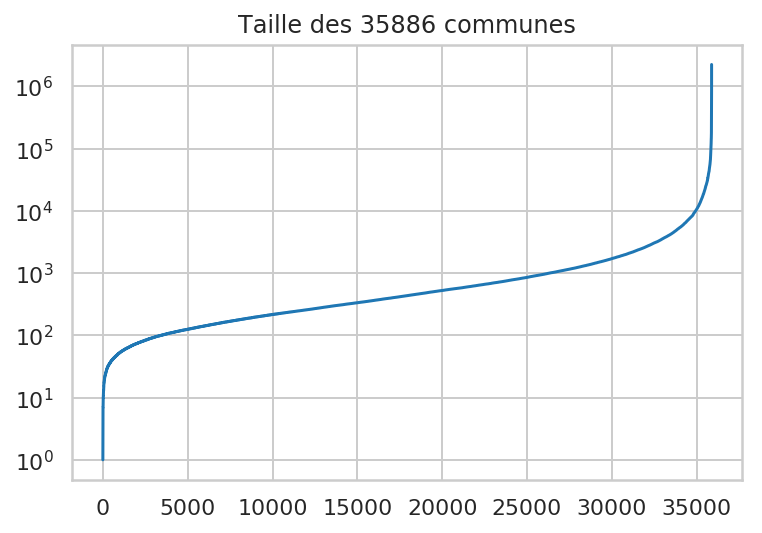

In [6]:
ax = sns.lineplot(x=np.arange(len(mayors)), y=np.sort(mayors['Population de la commune']))
ax.set_title('Taille des %d communes' % len(mayors))
ax.set(yscale='log') # you can try without a logarithm scale in y to see the result

On note qu'il y a plus de communes en dessous de 100 habitants qu'au dessus de 10 000 habitants.

### Distribution des données

On peut vouloir regarder la corrélation entre deux champs.
Ainsi les maires ont un âge et leur ville a un nombre d'habitant ce qui permet d'afficher l'âge en fonction de la taille de la population (pour voir si plus une ville est grande, plus son maire est âgé par exemple).

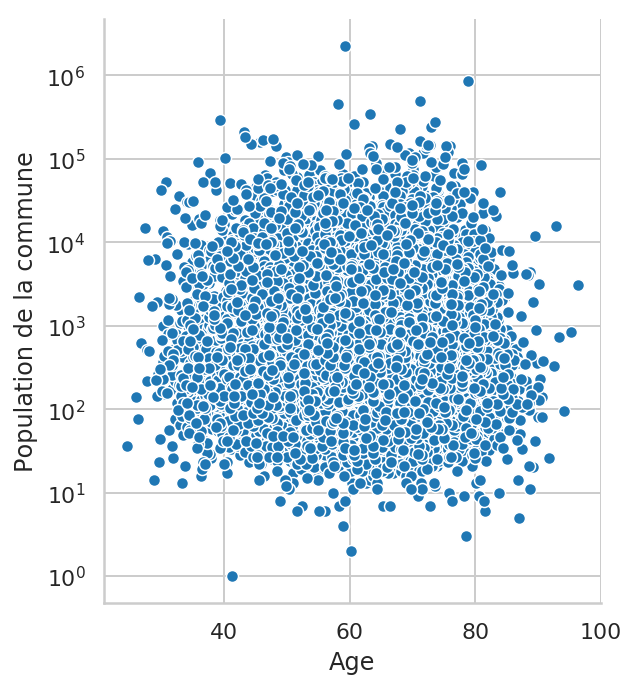

In [7]:
g = sns.relplot(data=mayors, x='Age', y='Population de la commune')
g.set(yscale='log') # same, without the log scale we cannot see anything

On peut aussi utiliser la couleur pour indiquer un troisième champs (argument `hue`) qui peut être une valeur réelle ou pas. La profession du maire ou son sexe par exemple sont des catégorie et non des valeur réelles mais cela convient.

On peut avoir un quatrième champs (argument `col`) mais alors il doit être une catégorie puisqu'on dessinera une figure par valeur.

In [8]:
sns.set_style('dark')
sns.set_context("talk")

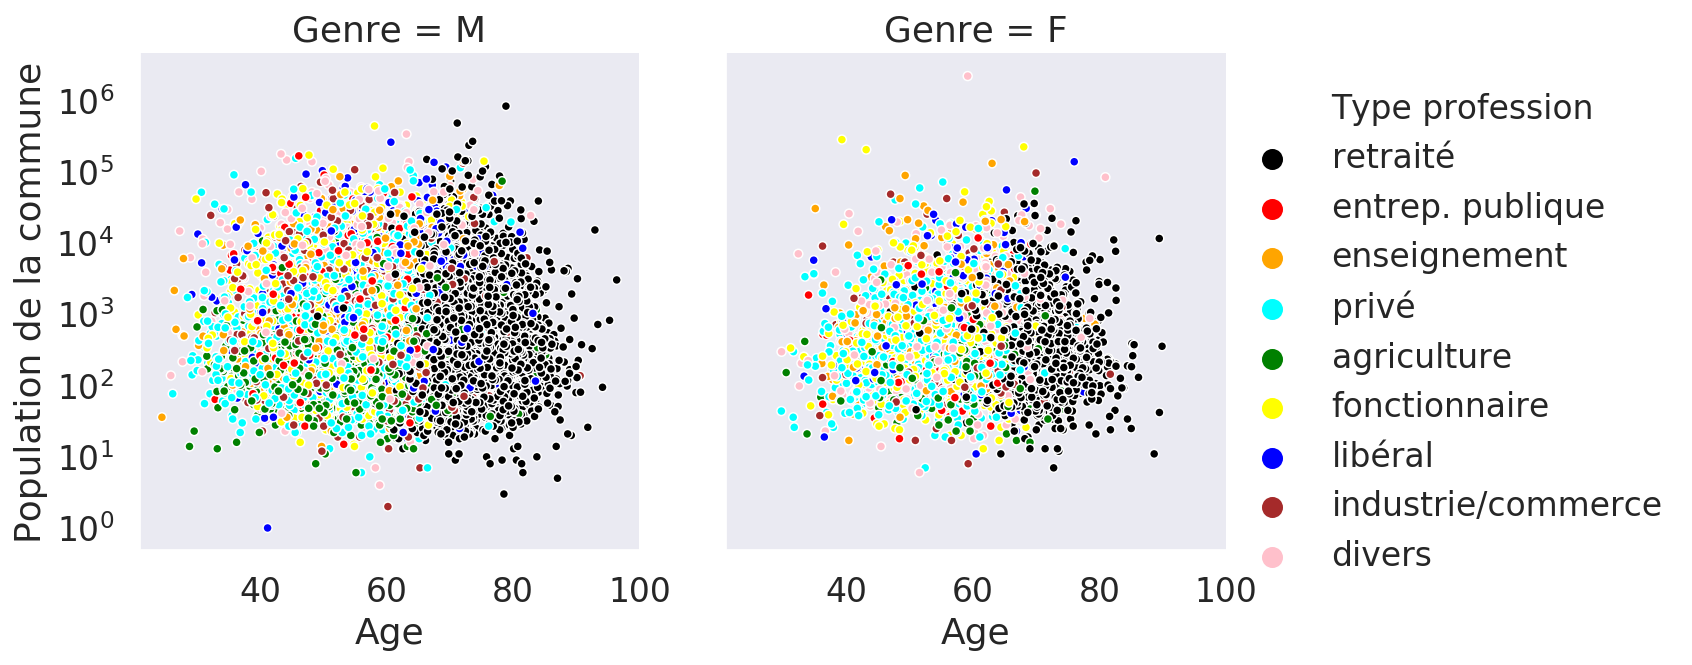

In [9]:
color_profession = {'agriculture':'g','industrie/commerce':'brown', 'privé':'cyan', 'libéral':'b', 'divers':'pink',
                    'fonctionnaire':'yellow', 'enseignement':'orange', 'entrep. publique':'r', 'retraité':'black'}
g = sns.relplot(data=mayors, x='Age', y='Population de la commune', hue='Type profession', palette=color_profession,
                marker='.', col='Genre')
g.set(yscale='log')

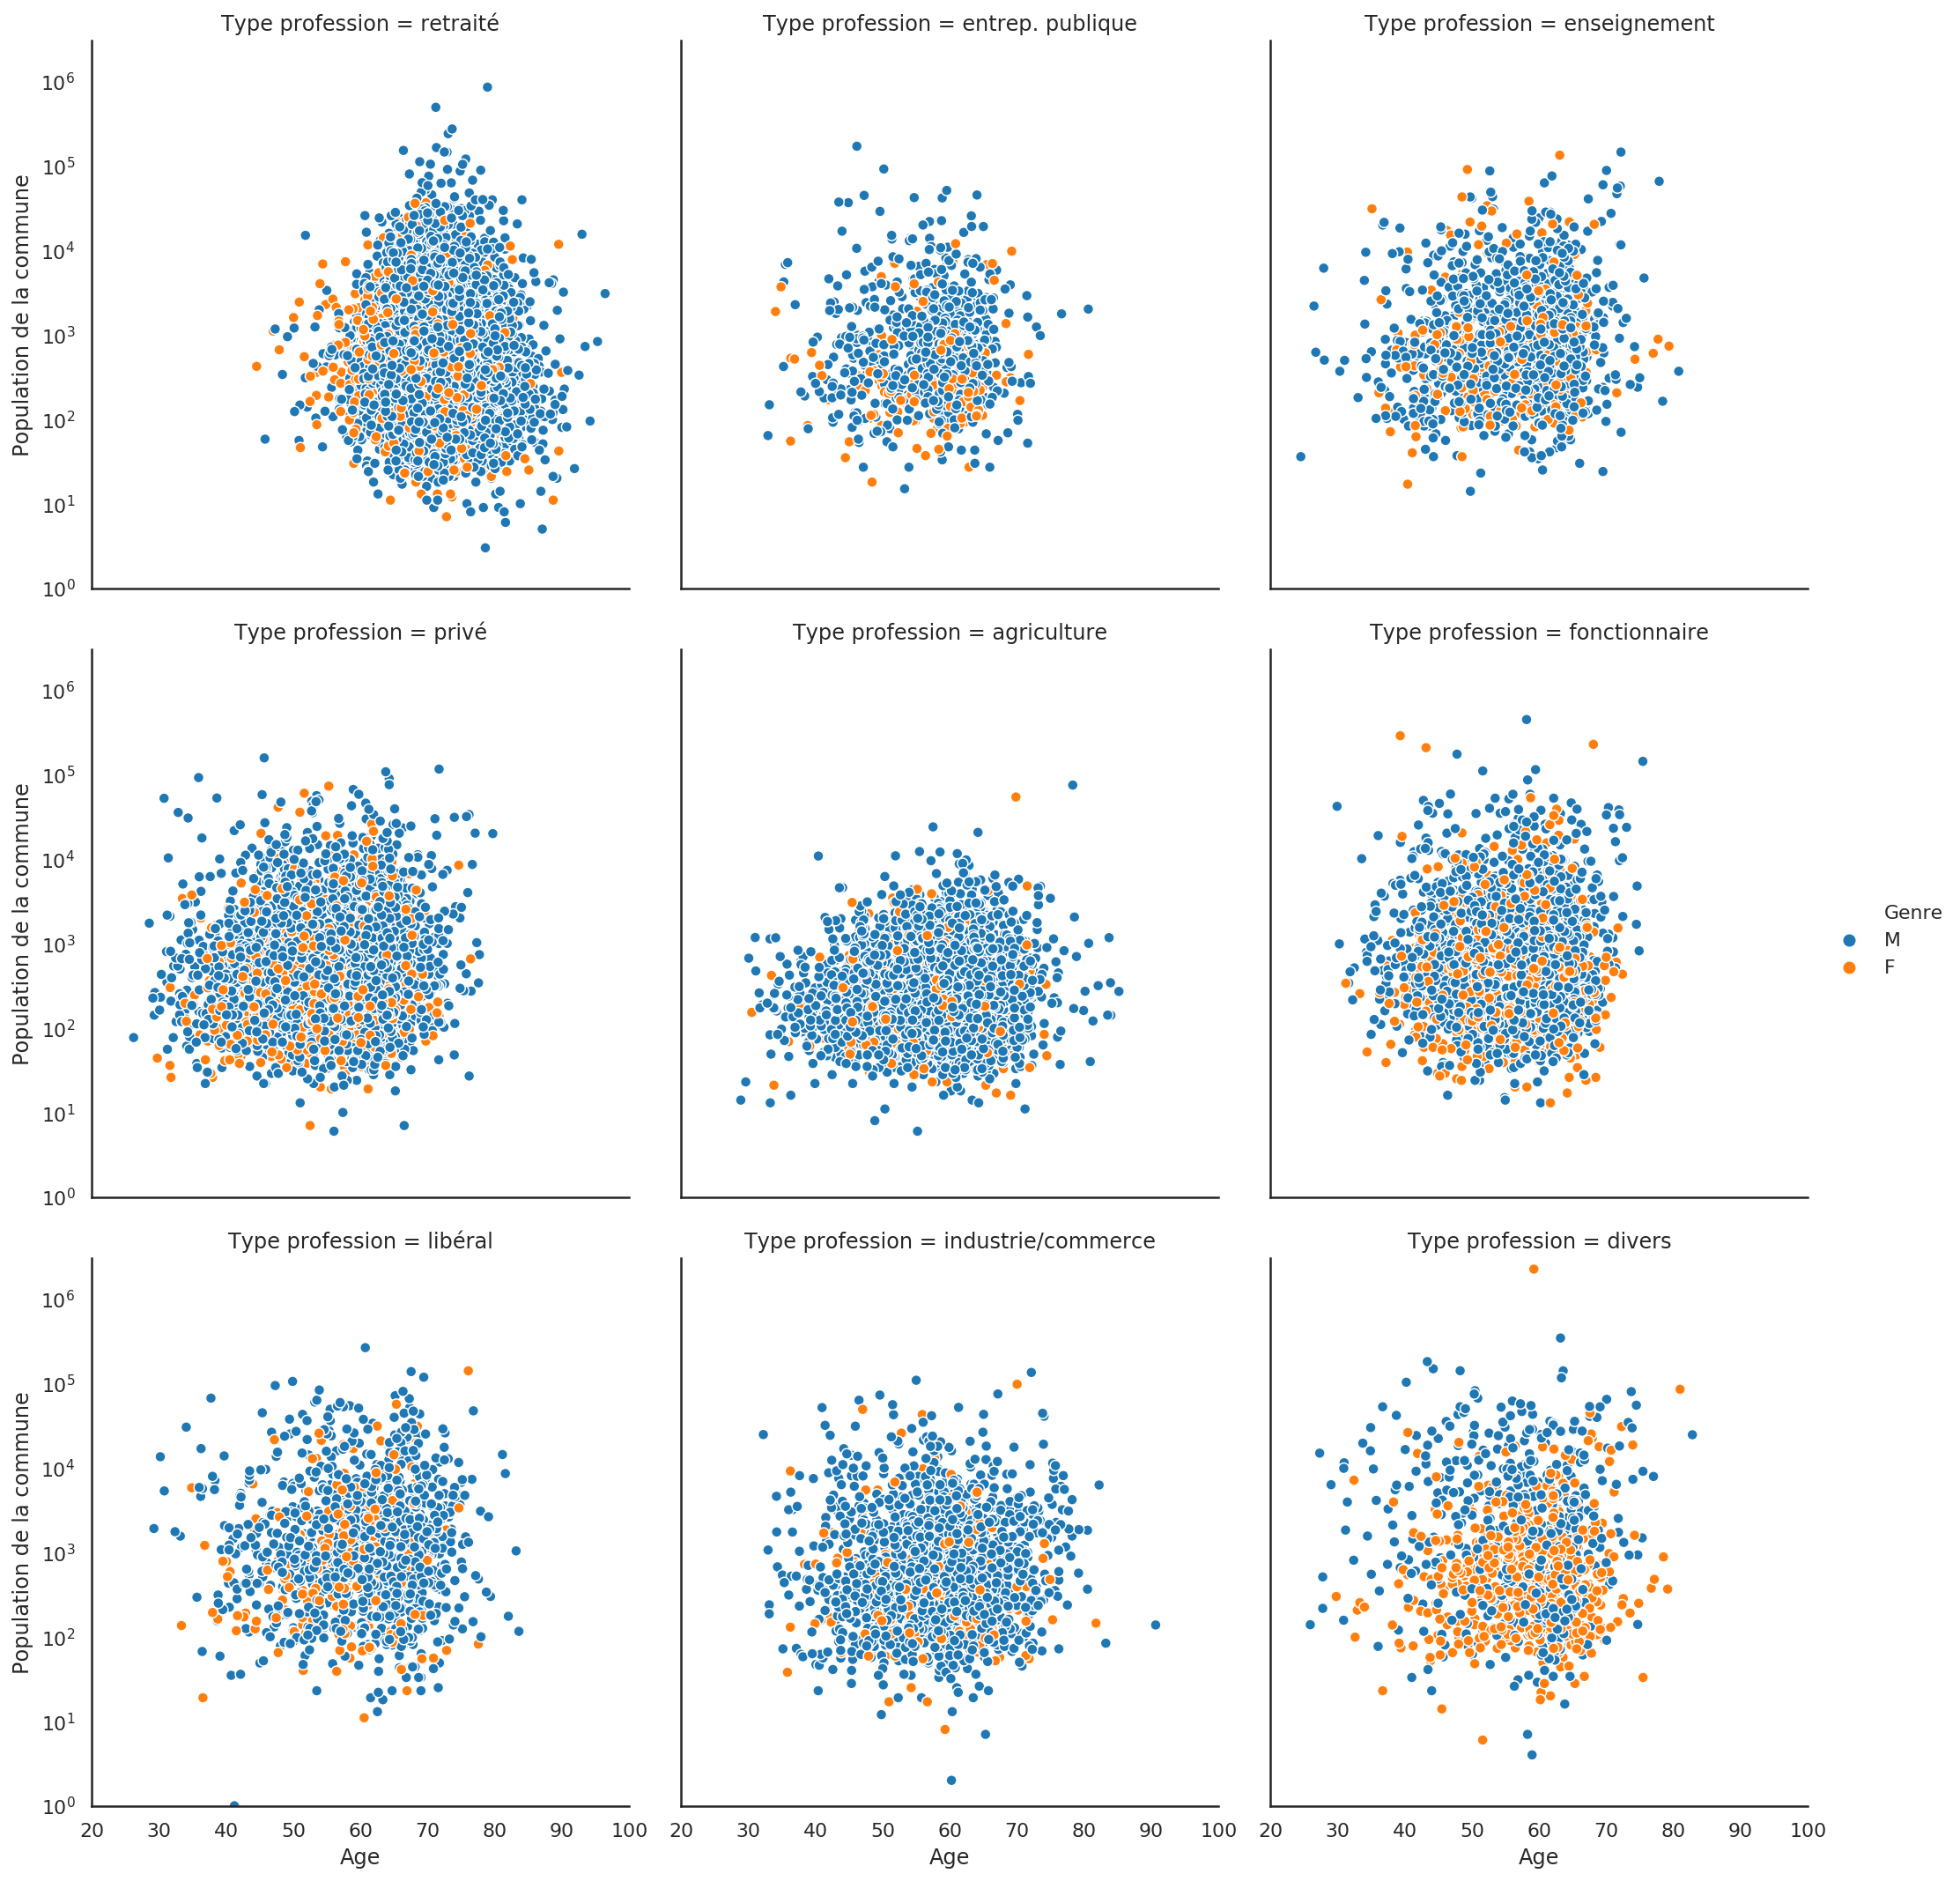

In [10]:
sns.set_style('white')
sns.set_context("notebook")
g = sns.relplot(data=mayors, x='Age', y='Population de la commune', hue='Genre', col='Type profession', col_wrap=3)
g.set(yscale='log', xlim=(20,100), ylim=(1,3000000))

### Corrélations globale de N champs 2 à 2

[`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
offre une vision globale des corrélations entre tous les champs d'un jeu de données. Il affiche une matrice NxN de figures
(avec N le nombre de champs pris en compte) avec pour la répartition de d'un champs par rapport à un autre et sur la 
diagonale l'histogramme du champs concerné.

Il est possible d'avoir un champs qui définie la couleur avec l'argument `hue`. Ce champs n'est pas pris en compte dans le nombre N de la matrice.

In [11]:
sns.set_style('darkgrid')

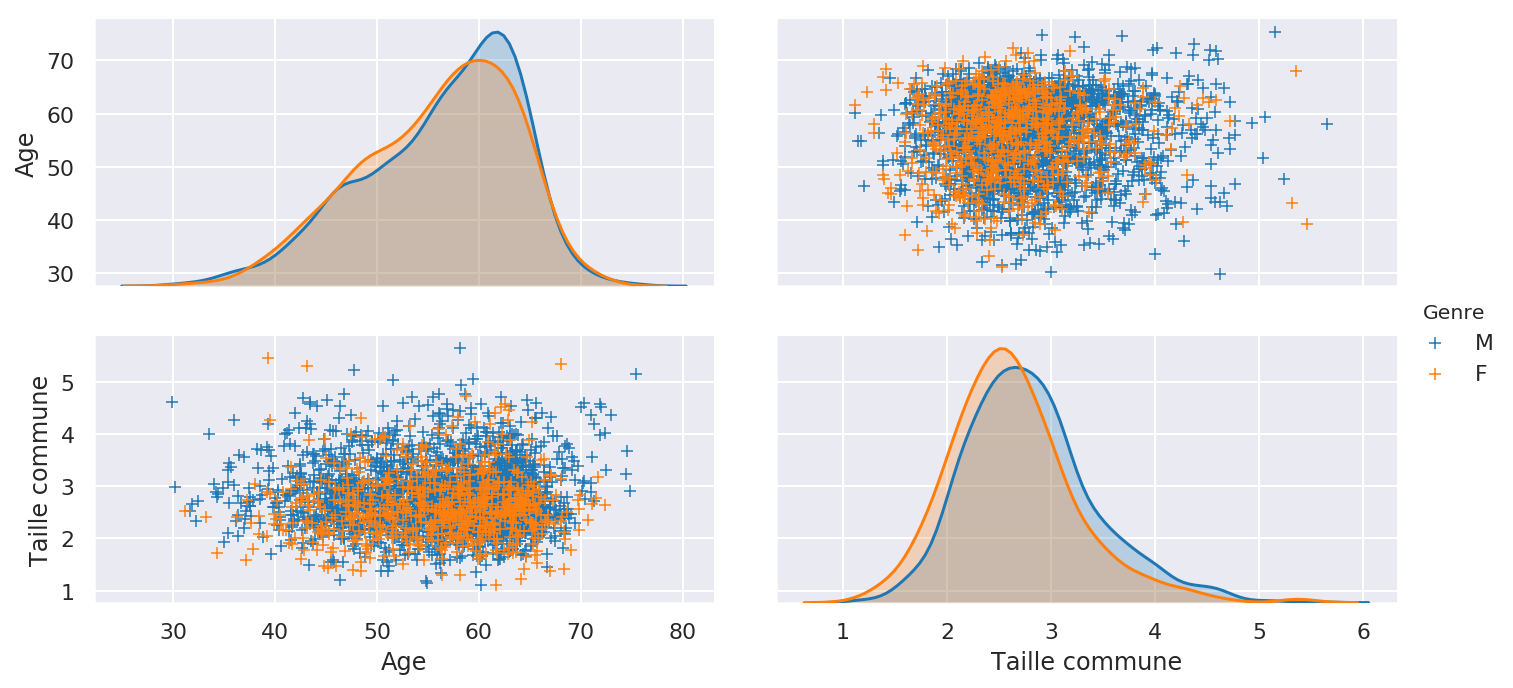

In [12]:
mayors['Taille commune'] = np.log10(mayors['Population de la commune'])
sns.pairplot(data=mayors[mayors['Type profession']=='fonctionnaire'][['Age', 'Taille commune', 'Genre']], 
             markers='+', hue='Genre', aspect=2)

### Afficher les valeurs de différentes catégories

[`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) permet de comparer toutes les catégories d'un
champs par rapport à un champs réel. Le type d'affichage est défini par l'argument `kind`. On a :

* `point` qui affiche la moyenne et l'écart type pour chaque catégorie et les relie avec des lignes (utile si les catégories sont ordonnées et qu'on veut suivre l'évolution, des années par exemple)
* `bar` qui affiche la même chose que `point` mais avec des bares et sans relier les catégories (intérêt pas évident)
* `box` et `boxen` offrent un affichage statistique de chaque catégorie (meilleure représentation statistique AMHA)
* `swarm` affiche un point par élément dans en forme d'arbre (bien pour voir le nombre d'éléments de chaque catégorie)
* `strip` affiche un point par élément dans une sorte de colonne (bien pour voir le nombre d'éléments mais `swarm` est plus joli AMHA)
* `violin` intègre dans une courbe les éléments de chaque catégorie pour en faire une pyramide ou un violon (affichage parfait pour une pyramide des âges ou équivalent)

Regarde l'âge des maires pour chaque type de profession revient à dessiner des pyramides des âges en séparant les femmes des hommes. La pyramide se fait avec `kind = 'violin'`.

In [13]:
sns.set_style('whitegrid')

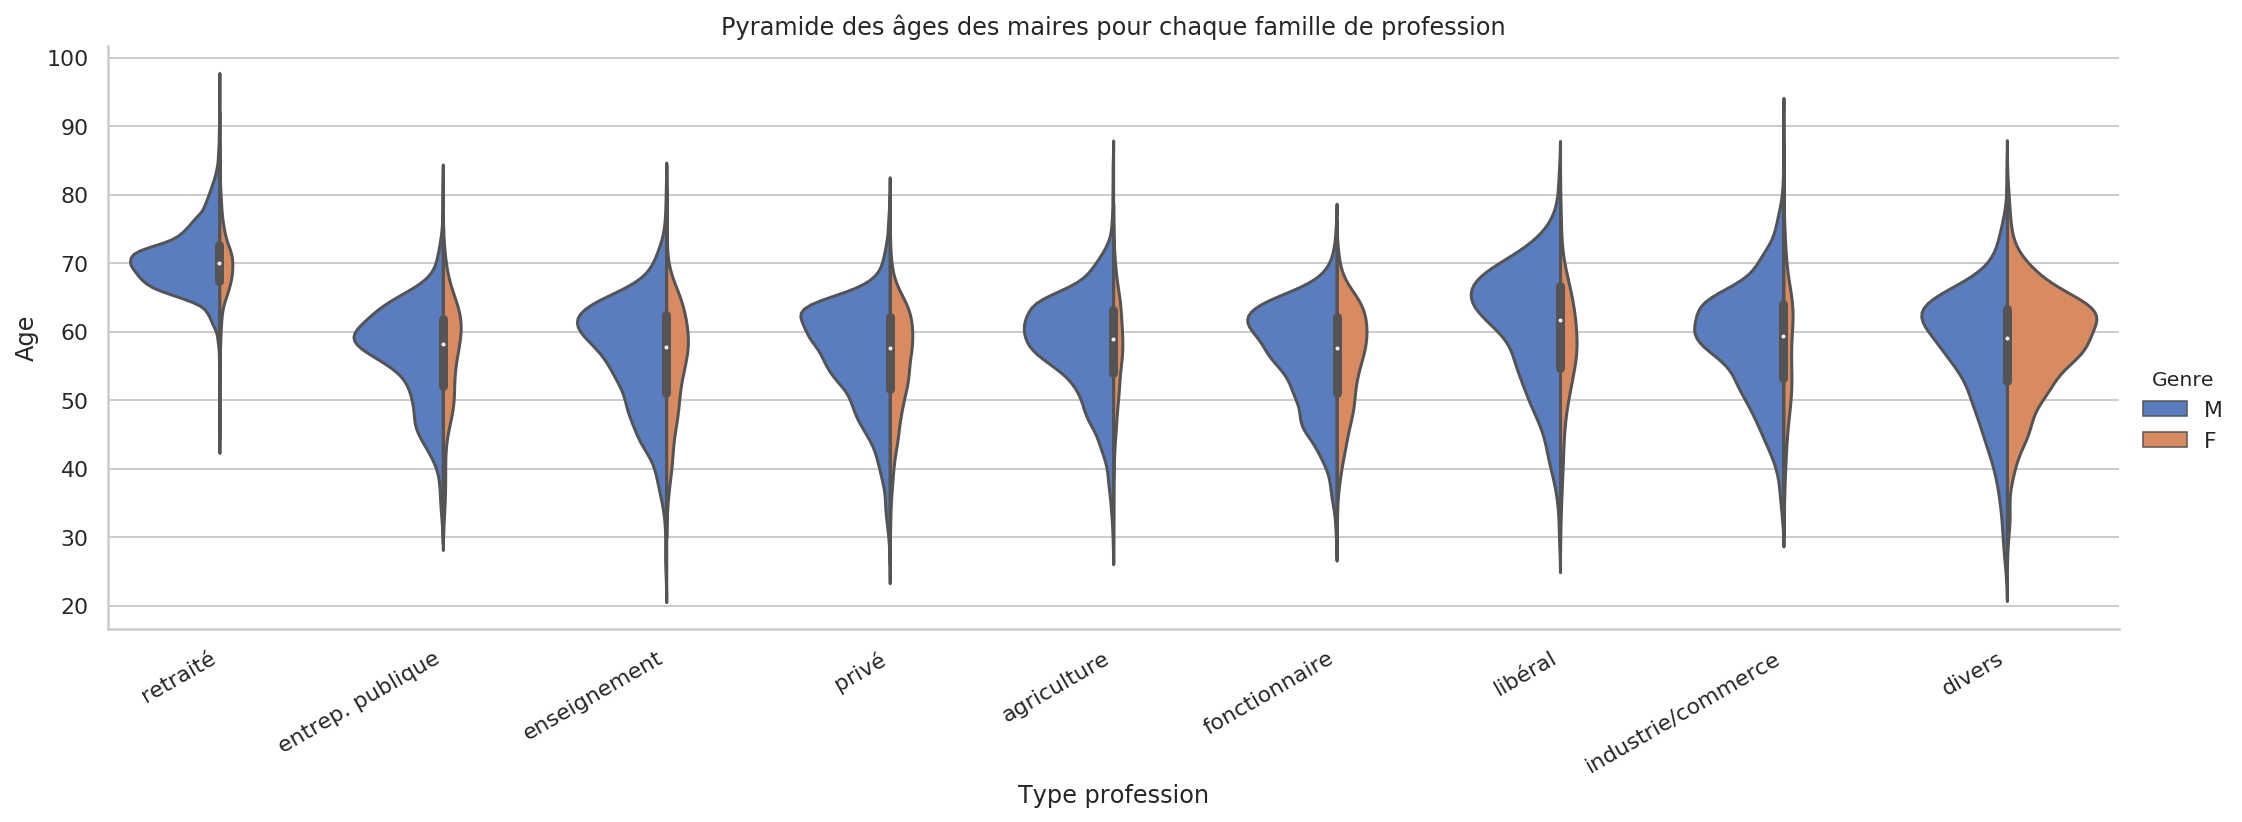

In [14]:
g = sns.catplot(data=mayors, x='Type profession', y="Age", hue="Genre", palette="muted", 
                kind='violin', scale='count', split=True, aspect=3)
g.set(title="Pyramide des âges des maires pour chaque famille de profession") # Mayors' age-sex pyramid for each type of professions
g.set_xticklabels(rotation=30, ha='right')

La catégorie "divers" a le plus de femmes. Regardons en détail les différents métiers de cette catégorie et affichons un point par maire avec `kind = 'swarm'` :

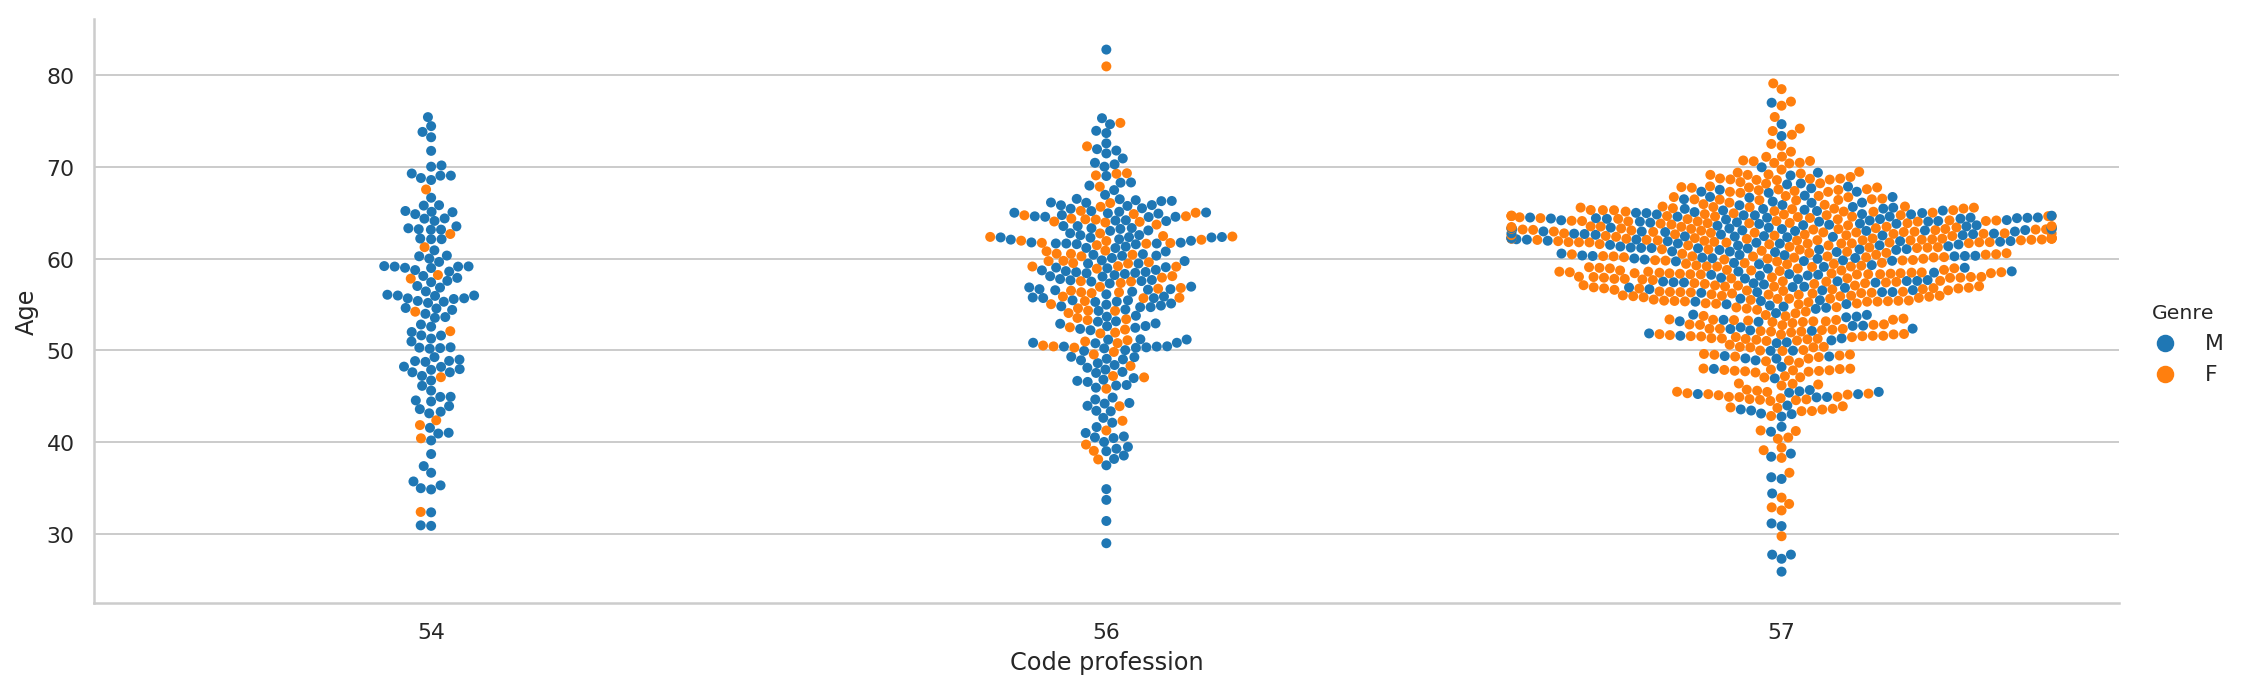

In [15]:
g = sns.catplot(data=mayors[mayors['Type profession']=='divers'], x='Code profession', y="Age", hue="Genre", 
                kind='swarm', aspect=3)

avec pour le Code profession :

* 54 : permanent politique
* 55 : ministre du culte (il n'y en a pas)
* 56 : autres professions
* 57 : sans profession déclarée

Les femmes sont majoritaire dans la profession "sans profession"...

### Combien sont-ils ?

Lorsqu'on a trop de données, afficher des petits points les uns sur les autres devient vite illisible.

[`joinplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) offre une alternative intéressante qui
permet d'estimer le nombre d'instances qui partagent les même valeurs. 
Pour cela il affiche un histogramme suivant chaque axe et, si `kind='kde'`, une carte sous forme de relief. 
Le sommet de la montagne représente le plus grand nombre de maires qui partage le même âge et un ville de même taille. Dans notre cas, il s'agit des maires de 70 ans dans des villes de 300 habitants.


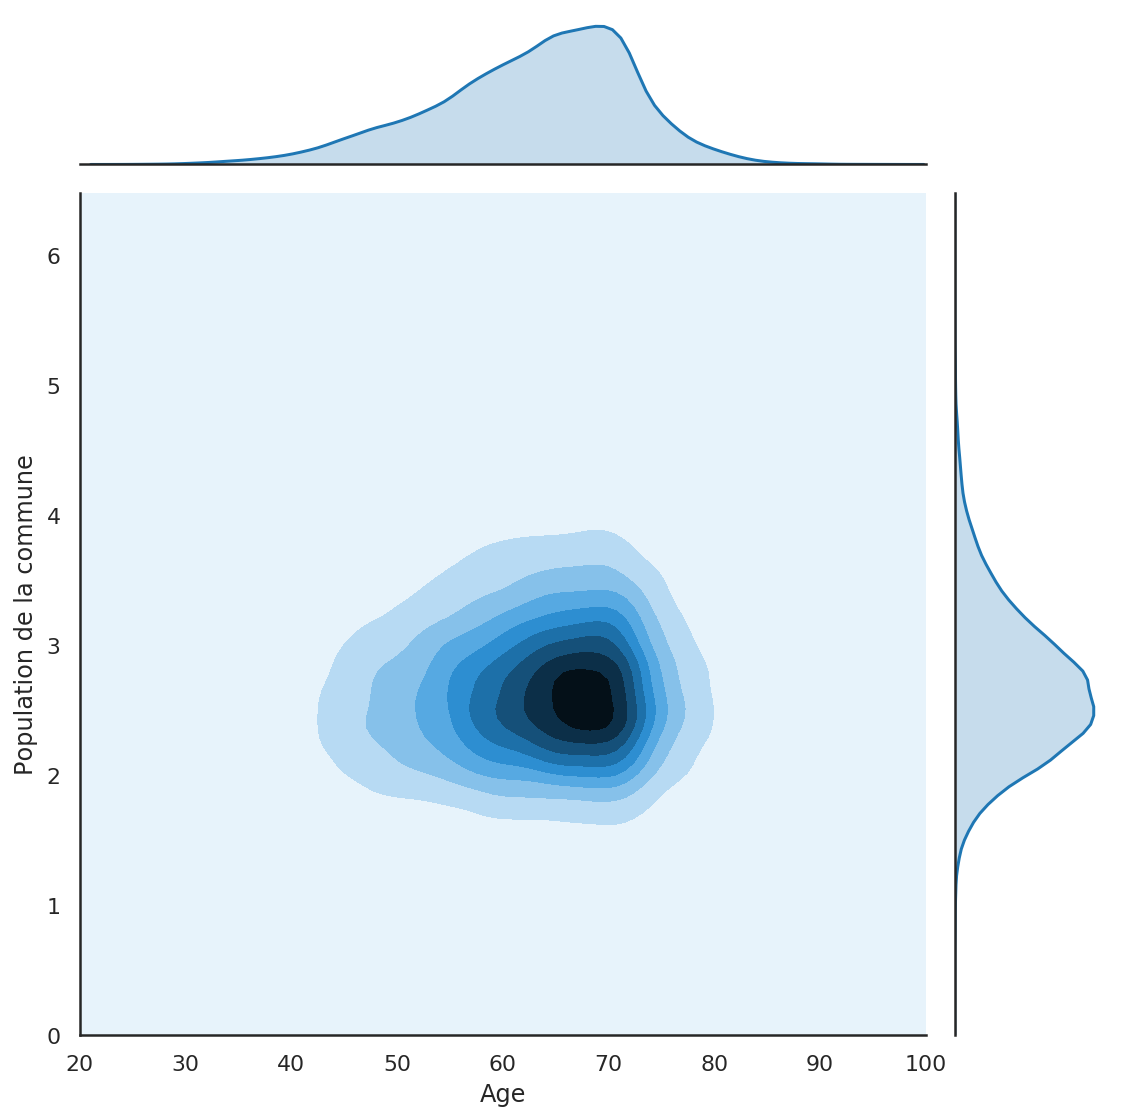

In [17]:
sns.set_style('white')
sns.jointplot(x=mayors.Age, y=np.log10(mayors['Population de la commune']), kind='kde',
              height=8, xlim=((20,100)), ylim=np.log10((1,3000000)))

Malheureusement `joinplot` ne permet pas d'avoir la légende qui indiquerait la valeur des lignes de niveaux...

On peut en avoir une idée affichant l'histogramme des âges. Le maximum est à 70 ans avec presque 5 % des maires qui ont cet âge.

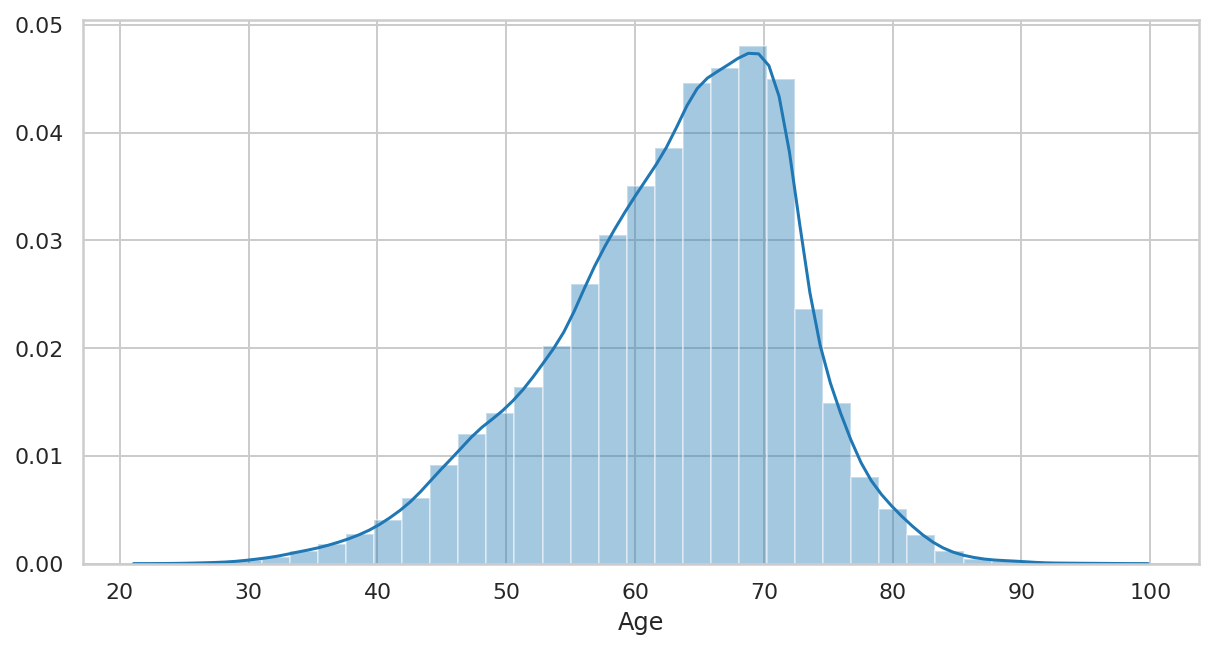

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(mayors.Age, bins=33)

In [19]:
len(mayors[(mayors.Age > 69.5) & (mayors.Age < 70.5)]) / len(mayors)

0.04851474112467257

## Statistiques

[`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) permet de tracer des régressions.

[None, (1, 3000000), (20, 100)]

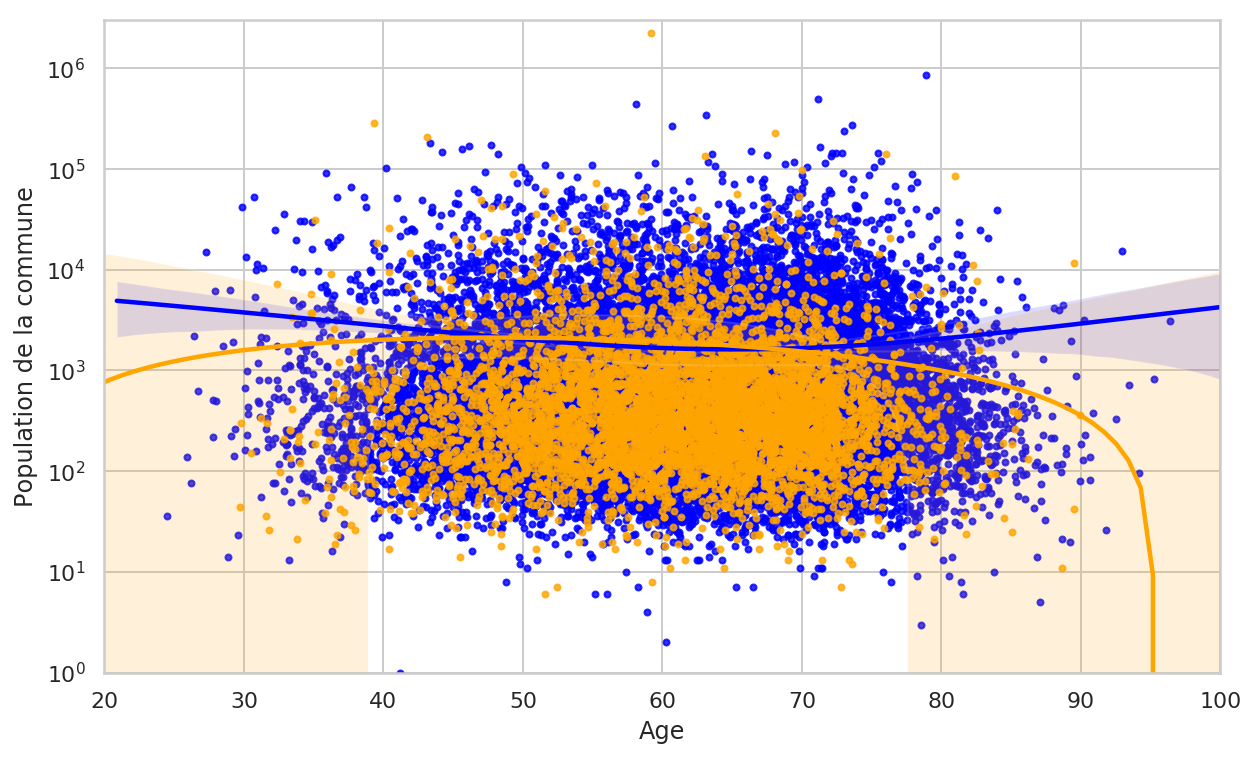

In [20]:
plt.figure(figsize=(10, 6))
ax =sns.regplot(data=mayors[mayors.Genre=='M'], x='Age', y='Population de la commune', color='b', marker='.', order=3)
sns.regplot(data=mayors[mayors.Genre=='F'], x='Age', y='Population de la commune', color='orange', marker='.', order=3)
ax.set(yscale='log', xlim=(20,100), ylim=(1,3000000))

On a vu que les femmes sont 5 fois moins nombreuses, on voit qu'elles gèrent des villes plus petites sauf autour de 60 ans où elles dépassent les hommes.

On note aussi la zone d'incertude qui est tellement large pour les femmes de moins de 38 ans et de plus de 77 ans que la courbe n'a rapidement plus beaucoup de sens.

### Moyenne et quartiles

Enfin l'affichage de boite à moustache donne

* la moyenne au milieu de la boite
* le premier et dernier quartile forment la boite
* la plus grande et plus petite valeur prises en compte sont les extrèmités de traits verticaux
* les points (losanges) en dehors des traits verticaux sont les données abérrantes donc pas prises en compte

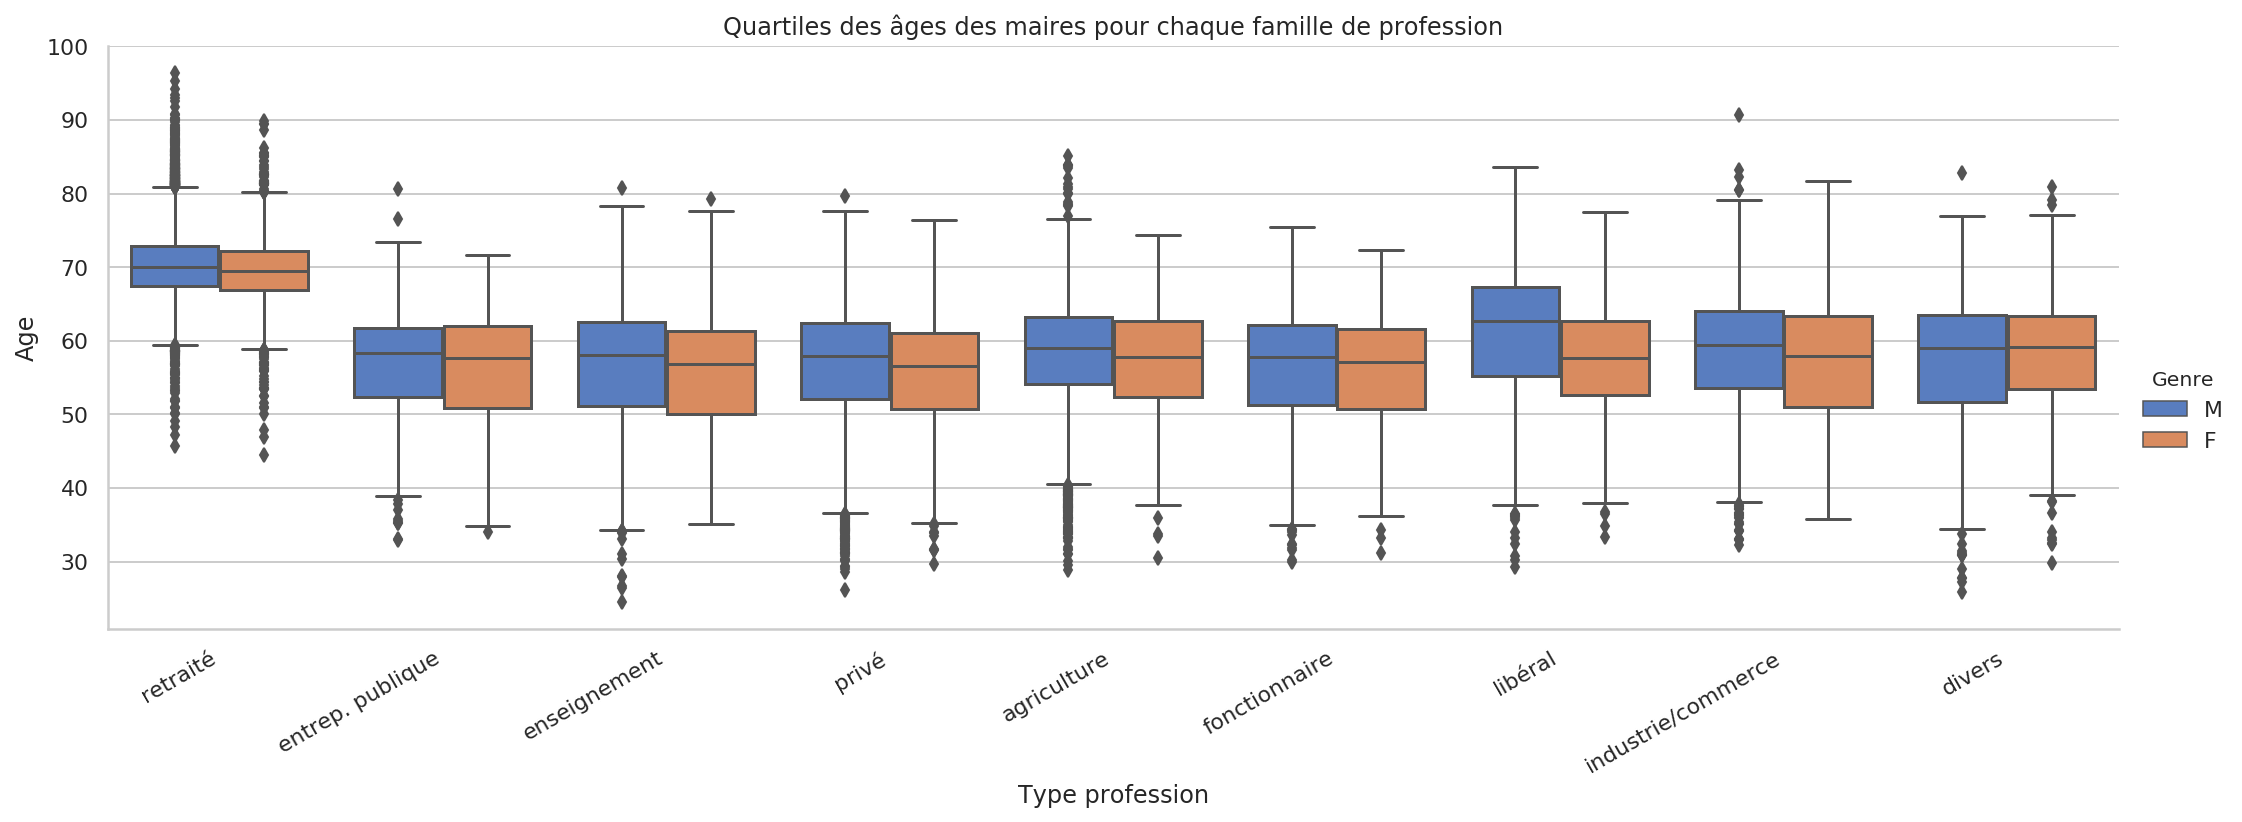

In [21]:
g = sns.catplot(data=mayors, x='Type profession', y="Age", hue="Genre", palette="muted", 
                kind='box', aspect=3)
g.set(title="Quartiles des âges des maires pour chaque famille de profession") # Mayors' age-sex pyramid for each type of professions
g.set_xticklabels(rotation=30, ha='right')

### Plus

Je vous invite à regarder la [gallerie d'exemples](http://seaborn.pydata.org/examples/index.html) pour avoir d'autres exemples des possibilités de Seaborn.

{{ PreviousNext("10 -- Static graphics with Matplotlib.ipynb", "20 -- Dynamic graphics with Plotly -- Basics.ipynb")}}